# SST: Analysis for Item Test

###Procedure

**Session 1**: 

1. Watch 4 videos of each town (2/town in a row)
2. <span style="color:red"> Item test (run 1)</span>
3. Navigation with arrows (2/town)
4. <span style="color:red">Item test (run 2)</span>

**Session 2**:

1. Watch 1 video of each town (2 for subjects 1-4)
2. <span style="color:red">Item test (run 3)</span>
3. Navigation with arrows (2/town)
4. Free navigation without arrows (2/town)
5. <span style="color:red">Item test (run 4)</span>

**Session 3**:

1. Test trials, navigate to item in each environment (2 cycles)
2. Questionnaire about strategies used, etc.
3. <span style="color:red">Item test (run 5)</span>
4. Map drawing
5. Spatial preference questionnaire

### Item test: 
Present subjects with image from town, and asked to recall the 3 items located within that town and to type the names of the items. If they didn't remember an item, they responded with a "?".


Sample image from town:

![env3](./images/env3.jpg)


## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op

# for plotting
sns.set(style='whitegrid', context='poster')
%matplotlib inline

# R for stats
%load_ext rpy2.ipython
%R require(lme4)
%R require(lmerTest)

Loading required package: lme4
Loading required package: Matrix
Loading required package: Rcpp


Loading required package: lmerTest

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:stats’:

    step



### Define color palette

In [2]:
palette = {'face': 'orange',
           'animal': 'dodgerblue',
           'object': 'lightseagreen',
           'food':  'mediumseagreen',
           'tool': 'mediumpurple'}

## Setup paths

In [3]:
dirs = dict()
dirs['basedir'] = op.join(op.expanduser('~'), 'Experiments/SST')
dirs['datadir'] = op.join(dirs['basedir'], 'data')
dirs['analydir'] = op.join(dirs['basedir'], 'analysis')
dirs['subj_info_file'] = op.join(dirs['datadir'], 'subj_info.csv')
dirs['object_cat_file'] = op.join(dirs['datadir'], 'object_cat.csv')

In [4]:
subj_info = pd.read_csv(dirs['subj_info_file'])
subj_info = subj_info[pd.isnull(subj_info.remove)]
subj_info[['subid']] = subj_info.subid.astype(str)

subj_info

,subid,group,voltage,remove
0,1,pilot,0,NaN
1,2,pilot,0,NaN
2,3,pilot,0,NaN
3,4,pilot,0,NaN


In [5]:
#Load in file w/object sub-categories for each town, convert to dict
obj_cat = pd.read_csv(dirs['object_cat_file'])
obj_cat = obj_cat.set_index('town').to_dict()['object_cat']

## Load in data

In [6]:
dt = pd.DataFrame() 
test = True
questionnaires_post = True

for subid in subj_info.subid:
    print subid

    if test:
        # add test file
        test_file = op.join(dirs['datadir'], subid, subid + '_behav_itemTest_coded.csv')
        d2 = pd.read_csv(test_file)
        d2['subid'] = subid
        dt = dt.append(d2, ignore_index=True)
        
# Compiled group data
if questionnaires_post:
    q_file = op.join(dirs['basedir'], 'data/Quest/Questionnaires_group.csv')
    dq_post = pd.read_csv(q_file, index_col=0)
    dq_post['subid'] = dq_post.subid.astype(str)

1
2
3
4


In [7]:
dt.head()

,index,run,trial,onset,duration,town,pic,itemNum,resp,respRT,itemType,acc,subid
0,7,1,3,39.8986,19.2681,Town1,env1.jpg,1,zebra,6.7555,animal,1,1
1,8,1,3,39.8986,19.2681,Town1,env1.jpg,2,george clooney,5.7986,face,1,1
2,9,1,3,39.8986,19.2681,Town1,env1.jpg,3,Lettuce,6.7118,object,1,1
3,52,2,6,89.7360,8.8618,Town1,env1.jpg,1,zebra,3.0541,animal,1,1
4,53,2,6,89.7360,8.8618,Town1,env1.jpg,2,george clooney,3.5342,face,1,1


#### Add in sub-type for objects

In [8]:
dt['itemType_sub'] = dt.itemType
dt.ix[dt.itemType == 'object', 'itemType_sub'] = dt[dt.itemType == 'object'].town.map(obj_cat.get)
dt.head()

,index,run,trial,onset,duration,town,pic,itemNum,resp,respRT,itemType,acc,subid,itemType_sub
0,7,1,3,39.8986,19.2681,Town1,env1.jpg,1,zebra,6.7555,animal,1,1,animal
1,8,1,3,39.8986,19.2681,Town1,env1.jpg,2,george clooney,5.7986,face,1,1,face
2,9,1,3,39.8986,19.2681,Town1,env1.jpg,3,Lettuce,6.7118,object,1,1,food
3,52,2,6,89.7360,8.8618,Town1,env1.jpg,1,zebra,3.0541,animal,1,1,animal
4,53,2,6,89.7360,8.8618,Town1,env1.jpg,2,george clooney,3.5342,face,1,1,face


In [9]:
dq_post.head()

,subid,compass,generalSOD,landmark,route,survey,surveySpatial,verbalSpatial,survey_pref
0,1,6,11,10,5,4,5,3,-6
1,2,5,12,10,8,5,4,2,-5
2,3,5,15,8,8,4,2,5,-4
3,4,7,15,9,8,7,4,3,-2


## Analysis

### Accuracy across runs, by type of item

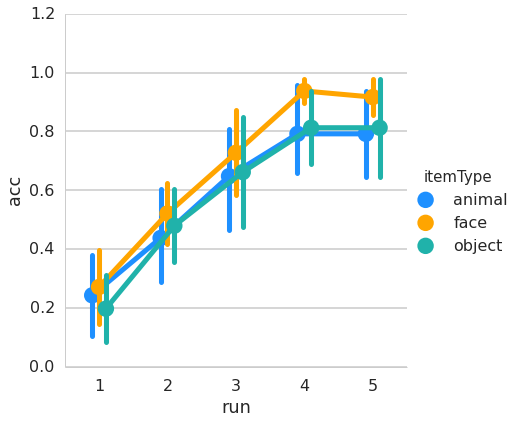

In [10]:
data = dt.groupby(['subid', 'run', 'itemType']).mean().reset_index()
sns.factorplot(x='run', y='acc', hue='itemType',
               dodge=.2,
               units='subid', ci=68, data=data,
               palette=palette, size=6)

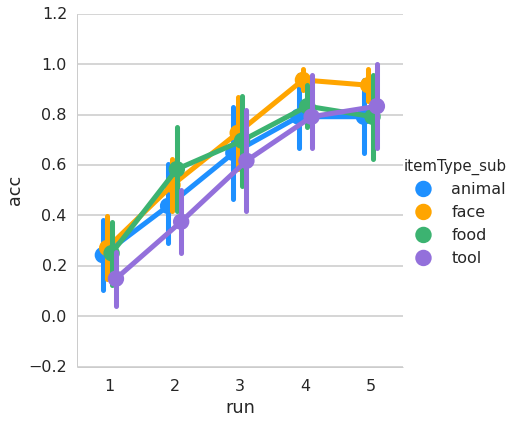

In [11]:
data = dt.groupby(['subid', 'run', 'itemType_sub']).mean().reset_index()
sns.factorplot(x='run', y='acc', hue='itemType_sub',
               dodge=.2,
               units='subid', ci=68, data=data,
               palette=palette, size=6)

#### Mean accuracy and standard error for final training (4th) run

In [12]:
data = dt[dt.run == 4].groupby(['itemType_sub']).mean().reset_index()[['itemType_sub', 'acc']]
data['st.err'] = dt[dt.run == 4].groupby(['itemType_sub']).std().reset_index()[['acc']]/subj_info.subid.size
data

,itemType_sub,acc,st.err
0,animal,0.791667,0.102604
1,face,0.937500,0.061156
2,food,0.833333,0.095173
3,tool,0.791667,0.103713


#### Broken down by subject

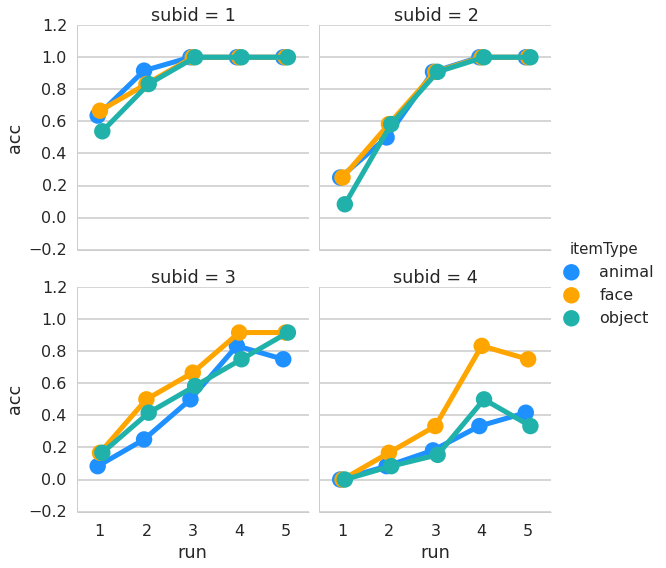

In [13]:
data = dt.groupby(['subid', 'run', 'itemType']).mean().reset_index()
sns.factorplot(x='run', y='acc', hue='itemType',
               dodge=.1,
               col='subid', col_wrap=2, data=data,
               palette=palette)

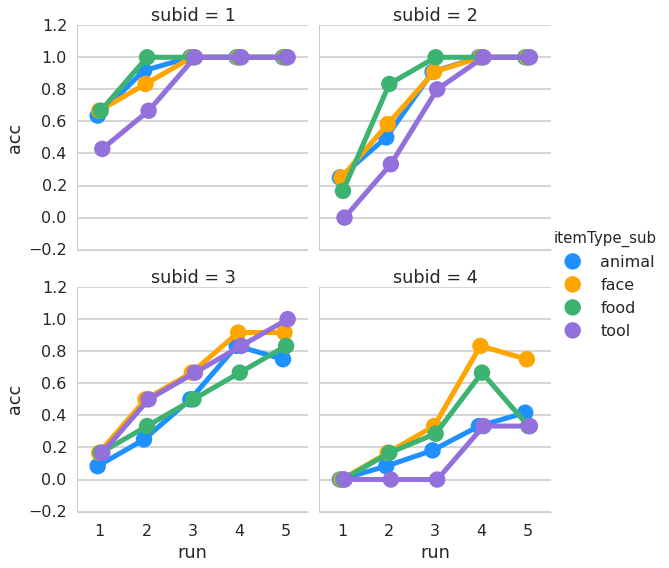

In [14]:
data = dt.groupby(['subid', 'run', 'itemType_sub']).mean().reset_index()
sns.factorplot(x='run', y='acc', hue='itemType_sub',
               dodge=.1,
               col='subid', col_wrap=2, data=data,
               palette=palette)

### Final training accuracy for item types

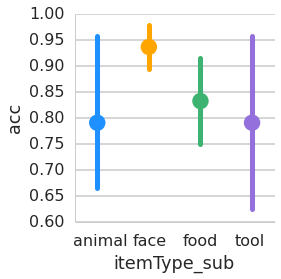

In [15]:
data = dt[dt.run == 4].groupby(['subid', 'run', 'itemType_sub']).mean().reset_index()
sns.factorplot(x='itemType_sub', y='acc', hue='itemType_sub',
               dodge=.1,
               units='subid', ci=68, data=data, palette=palette)

### How does final accuracy relate to spatial preference?

In [16]:
data = dt[dt.run == 4].groupby(['subid']).mean().reset_index()
data = data.merge(dq_post, on='subid')

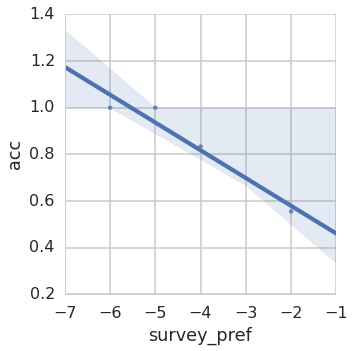

In [17]:
sns.lmplot(x='survey_pref', y='acc', 
           data=data)

#### Statistical difference between acc for different item types?

In [18]:
data = dt[dt.run == 4].groupby(['itemType_sub', 'subid', 'town']).mean().reset_index()[['subid', 'itemType_sub', 'acc', 'town']]
%R -i data

In [19]:
%%R

res1 = lmer(acc ~ itemType_sub + (1 | subid) + (1 | town), data=data)
res2 = lmer(acc ~ itemType_sub + (1 | subid), data=data)
print(anova(res1, res2, refit=FALSE))

print(summary(res2))

Data: data
Models:
..1: acc ~ itemType_sub + (1 | subid)
object: acc ~ itemType_sub + (1 | subid) + (1 | town)
       Df    AIC    BIC  logLik deviance Chisq Chi Df Pr(>Chisq)
..1     6 104.97 122.78 -46.483   92.965                        
object  7 105.58 126.37 -45.792   91.584 1.381      1     0.2399
Linear mixed model fit by REML ['merModLmerTest']
Formula: acc ~ itemType_sub + (1 | subid)
   Data: data

REML criterion at convergence: 93

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9703 -0.2600  0.2085  0.5774  1.5492 

Random effects:
 Groups   Name        Variance Std.Dev.
 subid    (Intercept) 0.04129  0.2032  
 Residual             0.09687  0.3112  
Number of obs: 144, groups:  subid, 4

Fixed effects:
                   Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)       7.917e-01  1.111e-01  3.780e+00   7.126  0.00254 **
itemType_subface  1.458e-01  6.353e-02  1.370e+02   2.295  0.02322 * 
itemType_subfood  4.167e-02  7.781e-02  1.370e+02 

### Final (run 4) accuracy across environments

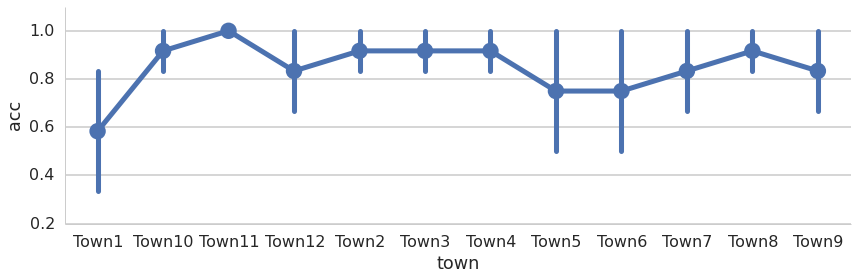

In [20]:
data = dt[dt.run == 4].groupby(['subid', 'run', 'town']).mean().reset_index()
sns.factorplot(x='town', y='acc', 
               dodge=.1, aspect=3,
               units='subid', ci=68, data=data)

#### Broken down by item type for each town

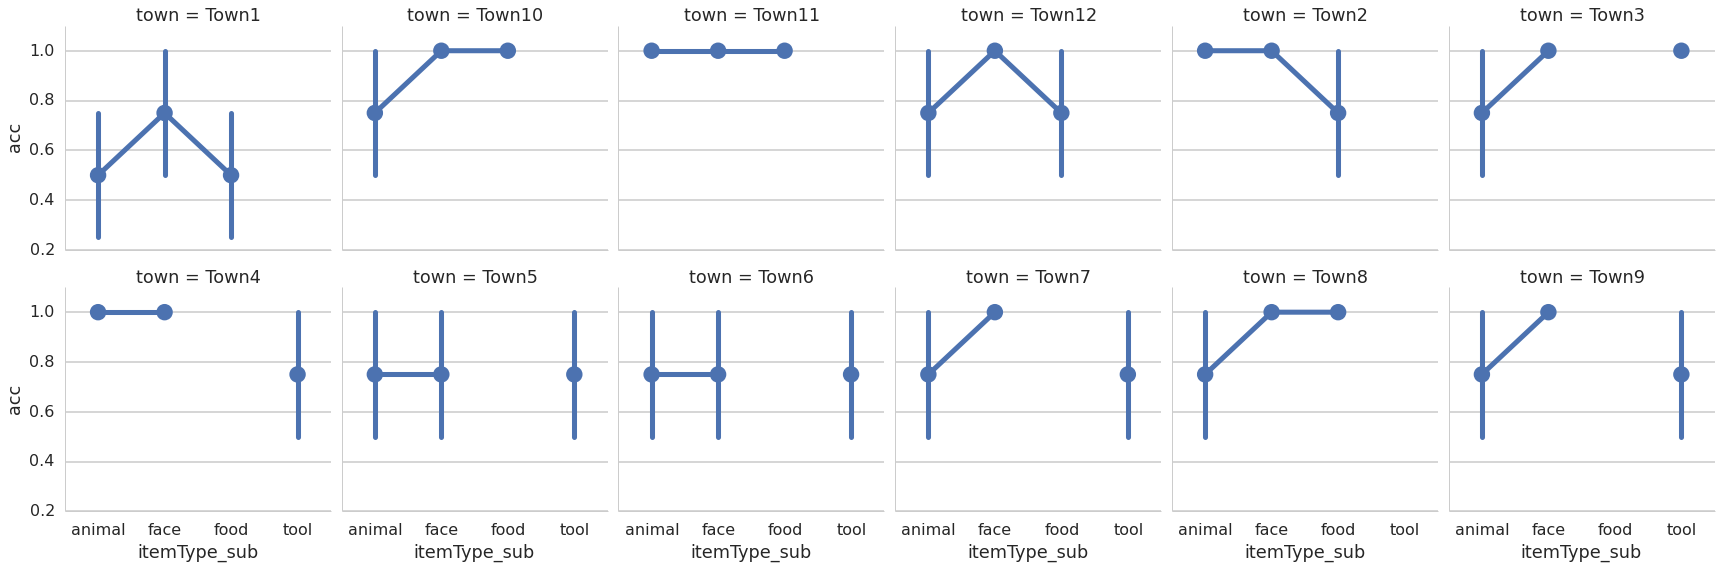

In [21]:
data = dt[dt.run == 4].groupby(['subid', 'run', 'town', 'itemType_sub']).mean().reset_index()
sns.factorplot(x='itemType_sub', y='acc', col='town', col_wrap=6,
               dodge=0, aspect=1, 
               units='subid', ci=68, data=data)

### Order of recalling items

#### Correct recall, run 4

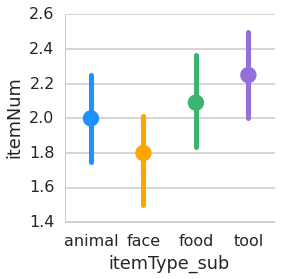

In [22]:
data = dt[(dt.acc == 1) & (dt.run==4)].groupby(['subid', 'itemNum', 'itemType_sub']).mean().reset_index()
sns.factorplot(x='itemType_sub', y='itemNum', 
               dodge=.1,
               units='subid', ci=68, data=data, palette=palette)

#### Correct recall, across runs

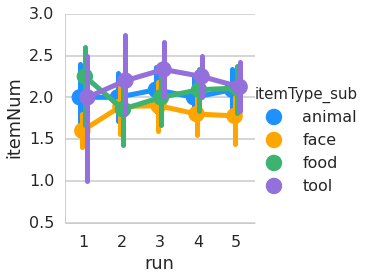

In [23]:
data = dt[(dt.acc == 1)].groupby(['subid', 'itemNum', 'itemType_sub', 'run']).mean().reset_index()
sns.factorplot(x='run', y='itemNum', hue='itemType_sub',
               dodge=.2,
               units='subid', ci=68, data=data,
               palette=palette)

## RTs for correct responses

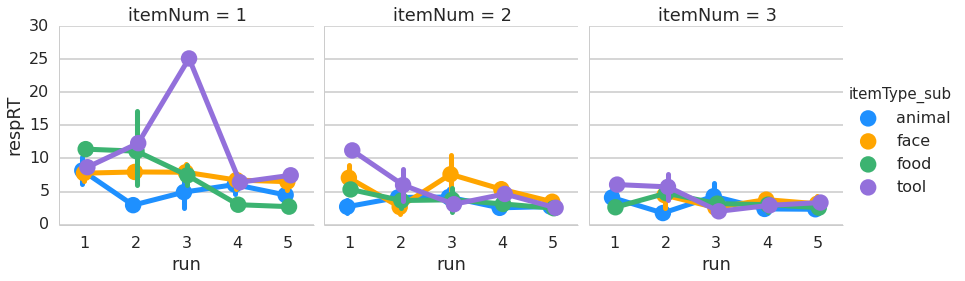

In [24]:
data = dt[dt.acc==1].groupby(['subid', 'run', 'itemType_sub', 'itemNum']).mean().reset_index()
sns.factorplot(x='run', y='respRT', hue='itemType_sub',
               col='itemNum',
               units='subid', ci=68,
               dodge=.1,
               data=data,
               palette=palette)

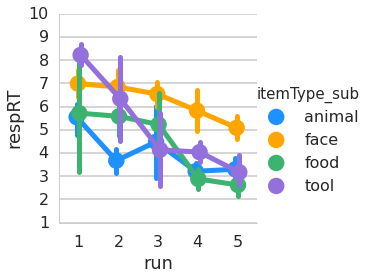

In [25]:
data = dt[dt.acc==1].groupby(['subid', 'run', 'itemType_sub']).mean().reset_index()
sns.factorplot(x='run', y='respRT', hue='itemType_sub',
               units='subid', ci=68,
               dodge=.1,
               data=data,
               palette=palette)